In [140]:
from IPython.display import Image
import random
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import wget

This notebook presents some statistics on the COCO-214 dataset.

In [141]:
class ValidationCaptions:
    def __init__(self, val_captions_path):
        assert os.path.exists(val_captions_path), 'Validation file does not exist'
        with open(val_captions_path) as fd:
            validation_captions = json.load(fd)
        # id refers to the caption id
        self._data = {anno['id']: anno for anno in validation_captions['annotations']}

    def __getitem__(self, key):
        return self._data[key]

    def __iter__(self):
        return iter(self._data)

In [142]:
# change path accordingly
validation_caption = ValidationCaptions('/Users/yesidcano/Downloads/annotations/captions_val2014.json')

In [143]:
# collect all captions associated with a single image
group_caption = {}
for item in validation_caption:
    img_id = validation_caption[item]['image_id']
    caption = validation_caption[item]['caption']
    if img_id not in group_caption:
        group_caption[img_id] = []

    group_caption[img_id].append(caption)


## Captions used for latency test.

In [69]:
# saves random captions to the json file
list_captions_ids = list(group_caption.keys())
random_samples = random.sample(list_captions_ids, 1000)

captions = [group_caption[s][random.randint(0,4)] for s in random_samples]

# Open the file in write mode
with open('query_captions_1000.json', 'w') as file:
    # Write the list to the file as JSON
    json.dump(captions, file)


In [70]:
len(captions)

1000

In [166]:
group_caption[491000]

['Pedestrians walking down a sidewalk next to a small street.',
 'People walking on a city street with light traffic.',
 'A city street with people walking and vehicles on the road.',
 'A scenic photograph of an urban street with people and traffic.',
 'Pedestrians are strolling along a city sidestreet in a touristy neighborhood.']

In [174]:
type(list(group_caption))
group_caption

{203564: ['A bicycle replica with a clock as the front wheel.',
  'The bike has a clock as a tire.',
  'A black metal bicycle with a clock inside the front wheel.',
  'A bicycle figurine in which the front wheel is replaced with a clock\n',
  'A clock with the appearance of the wheel of a bicycle '],
 179765: ['A black Honda motorcycle parked in front of a garage.',
  'A Honda motorcycle parked in a grass driveway',
  'A black Honda motorcycle with a dark burgundy seat.',
  'Ma motorcycle parked on the gravel in front of a garage',
  'A motorcycle with its brake extended standing outside'],
 322141: ['A room with blue walls and a white sink and door.',
  'Blue and white color scheme in a small bathroom.',
  'This is a blue and white bathroom with a wall sink and a lifesaver on the wall.',
  'A blue boat themed bathroom with a life preserver on the wall',
  'A bathroom with walls that are painted baby blue.'],
 16977: ['A car that seems to be parked illegally behind a legally parked car

In [144]:
class ValidationImages:
    def __init__(self, val_captions_path):
        assert os.path.exists(val_captions_path), 'Validation file does not exist'
        with open(val_captions_path) as fd:
            validation_captions = json.load(fd)
        # id refers to the caption id
        self._data = {anno['id']: anno for anno in validation_captions['images']}

    def __getitem__(self, key):
        return self._data[key]

    def __iter__(self):
        return iter(self._data)

In [145]:
validation_images = ValidationImages('/Users/yesidcano/Downloads/annotations/captions_val2014.json')

### Show random images along with their captions.

In [146]:
# Picks a random image and shows captions along with the image
def show_image_caption(img_id):
    coco_url = validation_images[img_id]['coco_url']
    image_file = wget.download(coco_url)
    print(group_caption[img_id])
    return image_file



['A cat standing in front of a TV showing a dog in a  cage.', 'A cat looks at a dog on television', 'A cat looks at a dog that is on tv.', 'A cat is looking at a television displaying a dog in a cage.', 'A cat stares at a dog on TV. ']
Image id: 180373


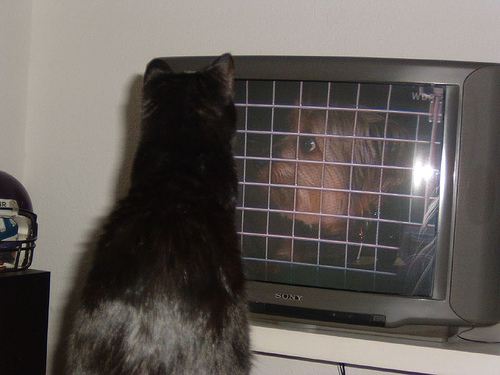

In [147]:
random_key = random.choice(list(group_caption.keys()))
image_file = show_image_caption(random_key)
print(f'Image id: {random_key}')
Image(image_file)

## Images height and width

In [148]:
def compute_dimensions_stat(data):

    width =[]
    height =[]
    for i in data:
        width.append(data[i]['width'])
        height.append(data[i]['height'])

    width_stats = {
        'mean': round(np.mean(width),4),
        'min': min(width),
        'max': max(width)
    }

    height_stats = {
        'mean': round(np.mean(height),4),
        'min': min(height),
        'max': max(height)
    }
    return width_stats, height_stats

In [149]:
validation_img_stats = compute_dimensions_stat(validation_images)
print(f'The average image width is: {validation_img_stats[0]["mean"]}, min: {validation_img_stats[0]["min"]} and max: {validation_img_stats[0]["max"]}')

The average image width is: 576.5415, min: 120 and max: 640


In [150]:
print(f'The average image height is: {validation_img_stats[1]["mean"]}, min: {validation_img_stats[1]["min"]} and max: {validation_img_stats[1]["max"]}')

The average image height is: 485.0699, min: 111 and max: 640


## Word distribution

In [151]:
def num_words(data):
    """
    Counts number of words per caption.
    """
    return [len((validation_caption[item]['caption']).split()) for item in data]

In [152]:
def plot_word_distribution(data, split):
    # Create histogram with Seaborn
    sns.distplot(data, kde=False)

    # Calculate and plot mean and standard deviation
    mean_value = np.mean(data)
    std_value = np.std(data)
    print(f'Standard deviation {std_value}')
    # Plot mean and standard deviation lines
    plt.axvline(x=mean_value, color='r', linestyle='--', label='Mean: {:.2f}'.format(mean_value))
    plt.axvline(x=mean_value+std_value, color='g', linestyle='--', label='Mean + SD: {:.2f}'.format(mean_value+std_value))
    plt.axvline(x=mean_value-std_value, color='g', linestyle='--', label='Mean - SD: {:.2f}'.format(mean_value-std_value))

    # Set title and labels
    plt.title(f"Word's distribution: {split} split")
    plt.xlabel("Words per caption")
    plt.ylabel("Frequency")

    # Display plot
    plt.legend()
    plt.show()

### Average number of words per caption in the Training set.

In [153]:
num_words_validation = num_words(validation_caption)

In [154]:
print(f'Min words per caption: {min(num_words_validation)} \n Max words per caption: {max(num_words_validation)}')


Min words per caption: 6 
 Max words per caption: 50


/var/folders/vq/w5yn9mmj69d2bh0ndyqj8t3m0000gn/T/ipykernel_54547/1433315117.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, kde=False)


Standard deviation 2.375200926397171


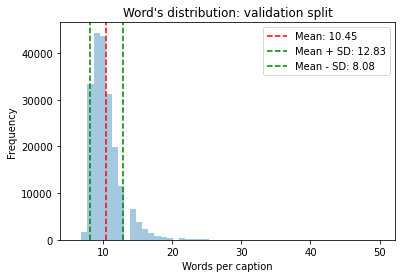

In [155]:
plot_word_distribution(num_words_validation, 'validation')